In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ThesisDataSet.txt',delimiter = '\t')
data = data[:7600]
data = data['sentences']

In [3]:
total_sentences = len(data)
sentences = {'sad':0,
             'happy':0,
             'angry':0,
             'surprise':0,
             'disgust':0,
             'fear':0}
for sentence in data:
    sentences[sentence.split()[0].lower()]+= 1
sentences

{'sad': 696,
 'happy': 1069,
 'angry': 698,
 'surprise': 364,
 'disgust': 346,
 'fear': 237}

In [4]:
word_pool = {'sad':[],
             'happy':[],
             'angry':[],
             'surprise':[],
             'disgust':[],
             'fear':[]}

In [5]:
for sentence in data:
    splitted = sentence.split()
    for k in range(1,len(splitted)):
        word_pool[splitted[0].lower()].append(splitted[k])

In [6]:
all_words = []
for emotion in word_pool:
    for word in word_pool[emotion]:
        all_words.append(word)

In [7]:
all_distinct_words = set(all_words)
len(all_distinct_words)

17272

In [8]:
def prepare_dictionary(sentence):
    words_from_sentence = sentence.split()
    probabilty = dict()
    for word in words_from_sentence:
        probabilty[word] = [.0000001 for k in range(7)]
    for word in words_from_sentence:
        k = 0
        for emotion in word_pool:
            total = all_words.count(word)
            tw = word_pool[emotion].count(word)
            if not tw == 0:
                probabilty[word][k] = tw/total
            k += 1
        probabilty[word][k] = total/total_sentences
    return probabilty

In [9]:
prepare_dictionary('দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগের মুলুকের দেশে পরিনত হচ্ছে?')

{'দেশকি': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0002932551319648094],
 'মধ্যম': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0005865102639296188],
 'আয়ের': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0002932551319648094],
 'দেশে': [0.37579617834394907,
  0.16560509554140126,
  0.20382165605095542,
  0.10191082802547771,
  0.08917197452229299,
  0.06369426751592357,
  0.046041055718475075],
 'রুপান্তর': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0002932551319648094],
 'হচ্ছে': [0.30120481927710846,
  0.18072289156626506,
  0.12048192771084337,
  0.13253012048192772,
  0.18072289156626506,
  0.08433734939759036,
  0.02434017595307918],
 'নাকি': [0.11764705882352941,
  0.058823529411764705,
  0.38235294117647056,
  0.19117647058823528,
  0.20588235294117646,
  0.04411764705882353,
  0.01994134897360704],
 'মগের': [1e-07,
  1e-07,
  0.6666666666666666,
  1e-07,
  0.3333333333333333,
  1e-07,
  0.0008797653958944282],
 'মুলুকের': [1e-07, 1e-07, 1.0, 1e-07, 1e-07, 1e-07, 0.0002932551319648

In [10]:
def count_probabilityNB(sentence):
    probability = prepare_dictionary(sentence)
    prob = [1 for _ in range(6)]
    for k in range(6):
        for word in sentence.split():
            if not word in all_words:
                prob[k] *= 1
            else:
                prob[k] *= probability[word][k]*probability[word][-1]
    return prob

In [11]:
count_probabilityNB('এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায় কেন ?')

[1.0126067289095177e-42,
 1.8501069155531636e-43,
 2.8976033837717627e-44,
 7.758835820095785e-31,
 1.0454155269986483e-44,
 1.656608780656294e-64]

<BarContainer object of 6 artists>

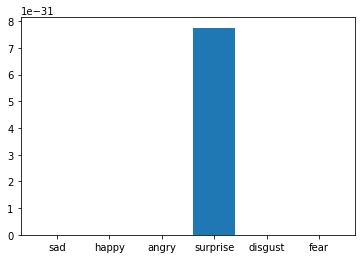

In [12]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('এবার লোকসমাগম খুব কম হয়েছে যা প্রশ্নই থেকে যায় কেন ?'))

<BarContainer object of 6 artists>

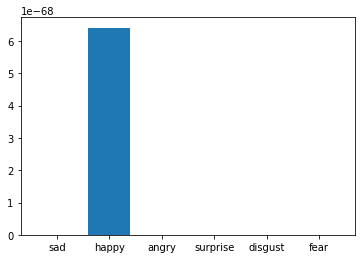

In [13]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্ধা। আমি চির রণবীর। আমি আল্লাহ ছারা কারও কাছে নিচু করি না আমার শির। নারায়ে তাকবির আল্লাহু আকবর।'))

<BarContainer object of 6 artists>

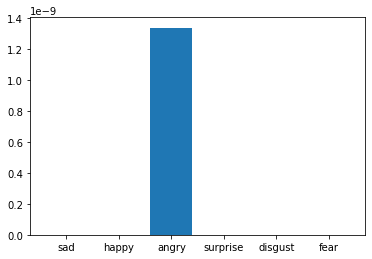

In [14]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('নাস্তিকরা কমতেছে তো'))

<BarContainer object of 6 artists>

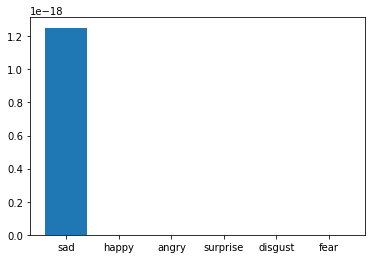

In [15]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('বহু বছরের পুরনো স্মৃতি মনে পারছে,'))

<BarContainer object of 6 artists>

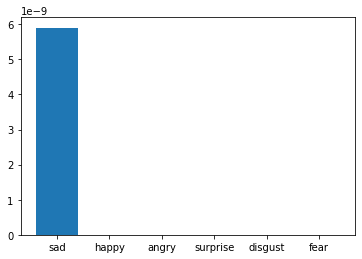

In [16]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB('ওটা আপনার লোকেরাই করছে।'))

<BarContainer object of 6 artists>

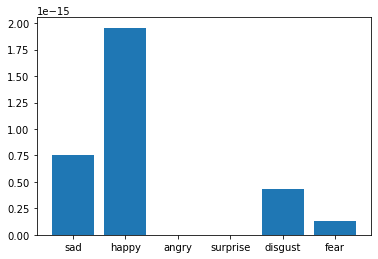

In [17]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'আমি কস্ট পেয়েছি'))

<BarContainer object of 6 artists>

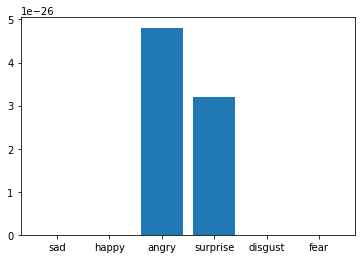

In [18]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'বাবা তোমার দরবারে সব পাগলের খেলা'))

<BarContainer object of 6 artists>

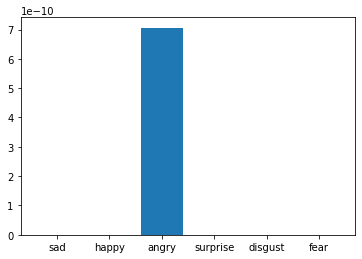

In [19]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'আমি ভাত খাই'))


<BarContainer object of 6 artists>

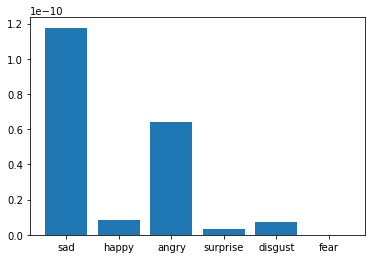

In [20]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'তুমি এমন কেনো ?'))

<BarContainer object of 6 artists>

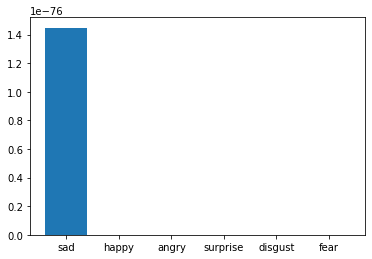

In [21]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'করোনা মহামারির কঠিন সময় কাটিয়ে উঠতে জোরালো বৈশ্বিক সহযোগিতার ওপর গুরুত্বারোপ করেছেন প্রধানমন্ত্রী শেখ হাসিনা। একই সঙ্গে তিনি ব্যবসা-বাণিজ্য ও বিনিয়োগ সম্প্রসারণের মাধ্যমে কোভিড-১৯ মহামারির বৈশ্বিক চ্যালেঞ্জ মোকাবিলা করতে জরুরি ভিত্তিতে সম্মিলিত পদক্ষেপ নেওয়ার আহ্বান জানান।'))

<BarContainer object of 6 artists>

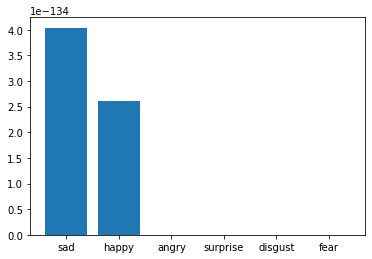

In [22]:
plt.bar(['sad','happy','angry','surprise','disgust','fear'],count_probabilityNB( 'গত এক দশকে বাংলাদেশ ৬ শতাংশের বেশি টেকসই প্রবৃদ্ধি অর্জন করেছে জানিয়ে শেখ হাসিনা বলেন, আমরা এলডিসি থেকে উত্তোরণের চূড়ান্ত সুপারিশ লাভ করেছি কোভিড-১৯ মহামারির সঙ্গে লড়াই করার সময়। আমরা জীবন ও জীবিকার মধ্যে একটি ভারসাম্য তৈরি করার চেষ্টা করছি। আমাদের সরকার এ পর্যন্ত ১৫.১ বিলিয়ন মার্কিন ডলার পরিমাণের বিভিন্ন প্রণোদনা প্যাকেজ ঘোষণা করেছে। মহামারি সত্ত্বেও, আমাদের জিডিপি প্রবৃদ্ধি ২০২০-২০১২ সালে ৬.১ শতাংশে পৌঁছেছে '))